<a href="https://colab.research.google.com/github/farooqosama908-dot/MAT-420/blob/main/WINE_FinalProject_Osama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our research question is "Predicting wine quality using alcohol and volatile acidity." By Osama Farooq

Greetings! We will use regression models to investigate components of wine, affecting the quality of the wine. Namely 2 main; Alcohol percentage and Volatile acidity

The libraries I will use today are as follows:

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

We will load our data set regarding wine qualities with different chemical features related to it's quality

In [55]:
df = pd.read_csv("wine-quality-white-and-red.csv")

In [56]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [59]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


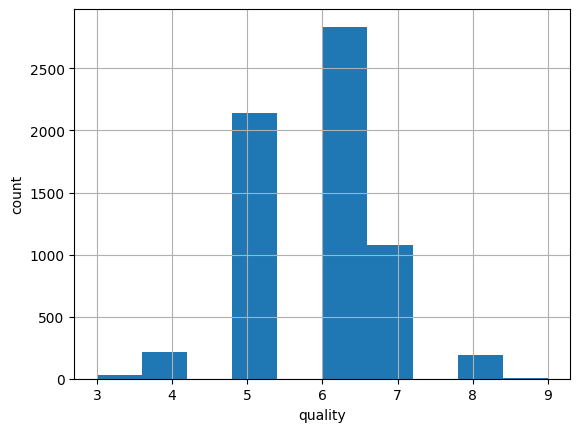

In [60]:
df['quality'].hist()
plt.xlabel('quality')
plt.ylabel('count')
plt.show()


Most wines in our set are between 5-7 score (medium quality). A few data points are extermely high and extermely low which may be harder to predict.

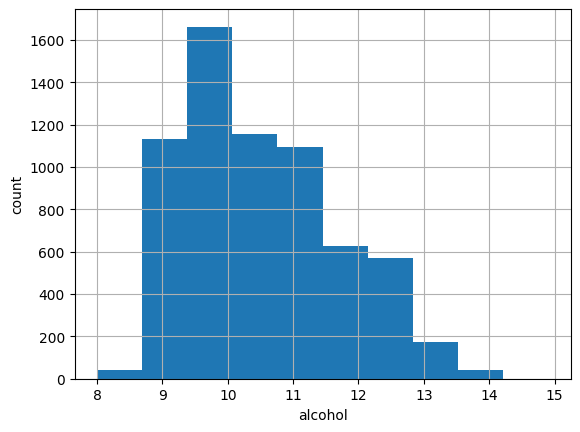

In [61]:
df['alcohol'].hist()
plt.xlabel('alcohol')
plt.ylabel('count')
plt.show()



Most wines have 9% to 11% alcohol percentage so we can use this chemical attribute to see if it affects the quality of the wines. The upward trend shows that higher alcohol level usually is in better quality wine as we see its values.

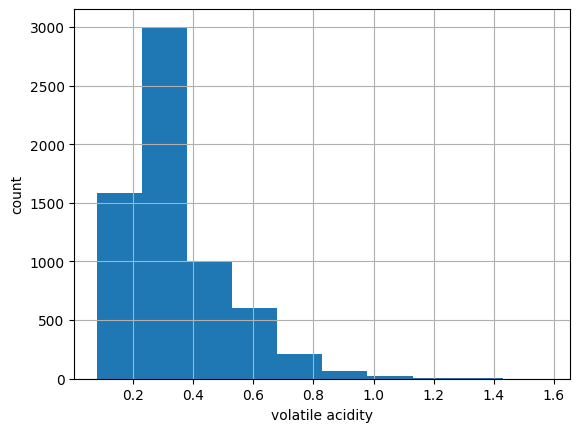

In [62]:
df['volatile acidity'].hist()
plt.xlabel('volatile acidity')
plt.ylabel('count')
plt.show()



Most wines have a low volatile acidity because higher score associates with "spoiled" product thus we can predict there is a negative association of acidity to the quality of the wine. So adding a negative predictor to our first one may be useful to predict and we can test it using regression.

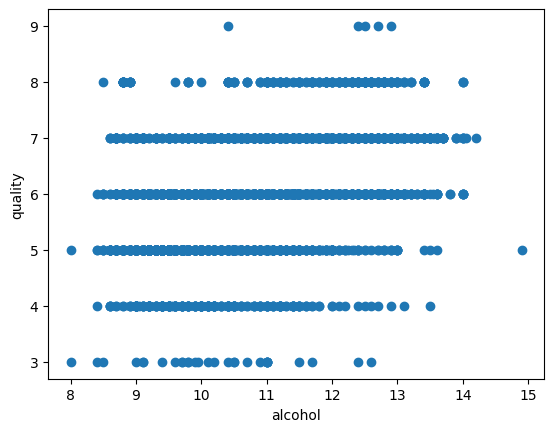

In [63]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()


The higher level of alcohol corresponding with higher quality can be seen on this scatter plot

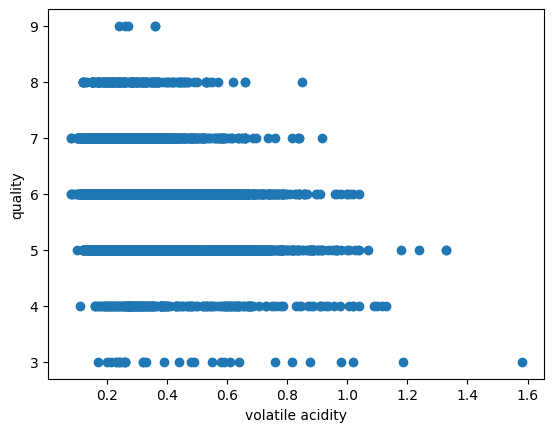

In [64]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()


Whereas a negative relation of acidity can be seen in this scatter plot where a lower volatile acidity is present in higher scored quality of wine

We will make our Model 1 using Alcohol as our feature for Quality

In [65]:
X = df[['alcohol']]
y = df['quality']


In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [67]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred1))


Coefficient of determination: 0.21


The R^2 score is 0.21 (21%) of alcohol in variance with wine quality.

Next we work on Model 2. Multiple linear regression using both Alcohol and Volatile Acidity as 2 features for quality

In [68]:
X = df[['alcohol', 'volatile acidity']]
y = df['quality']


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [70]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred2))


Coefficient of determination: 0.28


The R^2 for model 2 is 0.28  (28%). This model performs slightly better than model 1 because there are two key features determining wine quality. Higher Alcohol is usually better , The higher volatile acidity is lower quality.

Conclusion: Model 2 is more accurate at the prediction than model 1 based on two features rather than just one. The R^2 value is better 21% vs 28%. The accuracy is ofcourse not perfect as quality is a subjective feature. Our model improves as we add one -ve predictor (volatile acidity) as opposed to the alcohol level. It creates a more balanced, showing a relationship between chemical components with the quality of our wines.